In [39]:
# Part 1

def acc_rej_plt(n_samples=100000):
    from matplotlib import pyplot as plt
    import numpy as np
    from Notes import calculus_in_python as notes

    def target_FUN(x):
        if 0 < x < 1:
            return (np.exp(x ** 2) - 1) / (np.exp(1) - 1)
        elif x <= 0:
            return 0
        else:
            return 1

    def target_fun(x):
        return notes.df(target_FUN, x)

    def proposed_fun(x):
        return notes.get_normalized_function(lambda z: np.exp(z))(x)

    def reject_sampler(n_samples):

        accepted_samples = []

        target = lambda x: target_fun(x)
        proposal = lambda x: proposed_fun(x)
        # Calculate M
        x = np.linspace(0, 1, n_samples)
        y_target = [target_fun(val) for val in x]
        y_proposal = [proposed_fun(val) for val in x]
        M = round(max(y_target[i] / y_proposal[i] for i in range(len(x)) if y_proposal[i] > 0))  #round
        print("M:", M)

        while len(accepted_samples) < n_samples:
            x = np.log(np.random.uniform(0, 1) * (np.exp(1) - 1) + 1)  # np.random.uniform(0, 1)
            u = np.random.uniform(0, 1)

            if u <= target(x) / (M * proposal(x)):
                accepted_samples.append(x)  # Accept x

        return np.array(accepted_samples)

    samples = reject_sampler(n_samples)

    # Plot histogram of samples
    plt.hist(samples, bins=100, density=True, alpha=0.6, color='skyblue', edgecolor='black',
             label='Samples Histogram')

    # Plot the true density function
    x = np.linspace(0, 1, n_samples)  # Generate points in the range [0, 1]
    y = [target_fun(val) for val in x]
    plt.plot(x, y, color='red', label='True Density', linewidth=2)

    # Add labels and legend
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.title('Histogram of Samples with True Density')
    plt.legend()
    plt.show()

    return samples

M: 2


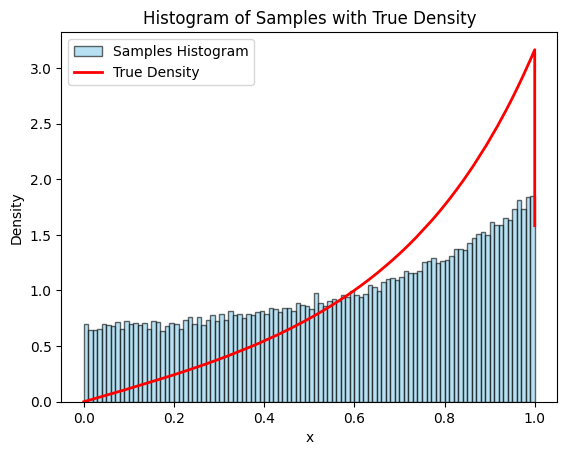

array([0.67702491, 0.74282014, 0.12393645, ..., 0.31317371, 0.80584331,
       0.65638361])

In [40]:
acc_rej_plt()